## Histone deacetylase 1 - part 3 (rule aggregation)

### Import libraries

In [16]:
import pandas as pd

### Read in the datasets

In [17]:
df = pd.read_csv('hdac1_inhibitors_stripped.csv')
df_pairs = pd.read_csv('hdac1_inhibitors_pairs.csv')

### Copy logD values over to 'pCHEMBL Value' column for later comparison.

In [18]:
df_exact = df[['stripped_smiles', 'assay_chembl_id', 'standard_type', 'standard_relation', 'standard_value', 'standard_units', 'pchembl_value']].copy()
df_exact['pchembl_value'] = df_exact.apply(lambda x: x['standard_value'] if x['standard_type'] == 'LogD' else x['pchembl_value'], axis=1)

### Filter exact measurements only.

In [19]:
df_exact = df_exact[(df_exact['standard_relation']=="=") & (pd.notna(df_exact['pchembl_value']))]
df_exact.sample(3).transpose()

,83,107,7
stripped_smiles,N#Cc1cccnc1-c1ccc(C(=O)Nc2ccccc2N)cc1,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(Cl...
assay_chembl_id,CHEMBL927948,CHEMBL927952,CHEMBL927950
standard_type,IC50,LogD,IC50
standard_relation,=,=,=
standard_value,12.3,1.68,8317.64
standard_units,nM,NaN,nM
pchembl_value,7.91,1.68,5.08


### Combine twice with confirmed molecular pairs.

In [20]:
df_merge = df_pairs.merge(df_exact, left_on='smiles1', right_on='stripped_smiles')
df_merge = df_merge.merge(df_exact, left_on=['smiles2', 'assay_chembl_id'], right_on=['stripped_smiles', 'assay_chembl_id'])
df_merge['pchembl_value_delta'] = df_merge['pchembl_value_y'] - df_merge['pchembl_value_x'] 
df_merge.sample(3).transpose()

,306,25,223
smiles1,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(Cl...,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,Cc1cc(CN2CCC2)cnc1-c1ccc(C(=O)Nc2ccccc2N)cc1
smiles2,Cc1cc(CN2CCN(C(C)C)CC2)cnc1-c1ccc(C(=O)Nc2cccc...,N#Cc1cccnc1-c1ccc(C(=O)Nc2ccccc2N)cc1,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(C)...
fragment1,[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][...,[cH3]-[c]1[n][cH][c]([CH2][N]2[CH2][CH2][N]([C...,[cH3][CH2][N]1[CH2][CH2][CH2]1
fragment2,[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][...,[cH3]-[c]1[n][cH][cH][cH][c]1[C]#[N],[CH3][CH2][N]1[CH2][CH2][N]([CH2][cH3])[CH2][C...
percentmcs,0.909091,0.676471,0.84375
smirks,[#6:14](-[#6:8](-[#7:5]1-[#6:22](-[#6:19](-[#7...,[#6](-[#6](-[#6](-[H])(-[H])-[H])(-[#7]1-[#6](...,[#6:7]-[#6:10](-[#7:6]1-[#6:17](-[#6](-[#6:16]...
stripped_smiles_x,CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(Cl...,CC(C)N1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c...,Cc1cc(CN2CCC2)cnc1-c1ccc(C(=O)Nc2ccccc2N)cc1
assay_chembl_id,CHEMBL927952,CHEMBL927949,CHEMBL927948
standard_type_x,LogD,IC50,IC50
standard_relation_x,=,=,=


### Filter mcs > 90% and aggregate by the two fragments.

In [21]:
df_agg = df_merge[df_merge.percentmcs > 0.9]
df_agg = pd.pivot_table(df_agg, values='pchembl_value_delta', index=['fragment1', 'fragment2'], columns='assay_chembl_id', aggfunc=['count','mean'])
df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]
df_agg

count CHEMBL927948  \
fragment1                                          fragment2                                                                
[CH3][CH2][N]1[CH2][CH2][NH][CH2][CH2]1            [CH3][CH]([CH3])[N]1[CH2][CH2][NH][CH2][CH2]1                      3.0   
[CH3][CH]([CH3])[N]1[CH2][CH2][NH][CH2][CH2]1      [CH3][CH2][N]1[CH2][CH2][NH][CH2][CH2]1                            3.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH2][N]2[CH2][C...                 1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[CH3] [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[C...                 3.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[Cl]                  2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[F]                   2.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[C... [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[CH3]                 3.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[Cl]                  2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[F]                   2.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[Cl]  [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[CH3]                 2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[C...                 2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[F]                   1.0   
[cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[F]   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[CH3]                 2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[C...                 2.0   
                                                   [cH2][c]([cH2])-[c]1[n][cH][c]([CH3])[cH][c]1[Cl]                  1.0   

                                                                                                       count CHEMBL927949  \
fragment1                                          fragment2                                                                
[CH3][CH2][N]1[CH2][CH2][NH][CH2][CH2]1            [CH3][CH]([CH3])[N]1[CH2][CH2][NH][CH2][CH2]1      

### ...and finally plot (figure 3 from wizepairz paper)

In [22]:
%matplotlib inline

<AxesSubplot:xlabel='mean CHEMBL927952', ylabel='mean CHEMBL927948'>

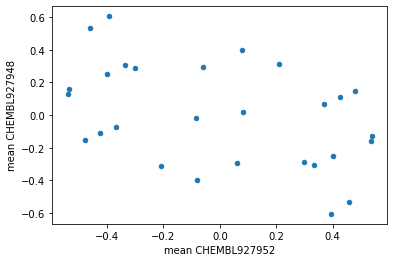

In [23]:
df_agg.plot.scatter('mean CHEMBL927952', 'mean CHEMBL927948')